In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
                           
from idaes.core import FlowsheetBlock
from pyomo.opt import TerminationCondition, SolverStatus
                           
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
                           
from HFCS_bmimAc_PR import configuration as config1
from HFCS_bmimPF6_PR import configuration as config2
from HFCS_emimTf2N_PR import configuration as config3
from HFCS_hmimCl_PR import configuration as config4

from idaes.generic_models.unit_models import Flash

from idaes.core.util.model_statistics import degrees_of_freedom

import idaes.logger as idaeslog

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

In [2]:
m1 = ConcreteModel()

m1.fs = FlowsheetBlock(default={"dynamic": False})

m1.fs.properties = GenericParameterBlock(default=config1)

m1.fs.F101 = Flash(default={"property_package": m1.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m2 = ConcreteModel()

m2.fs = FlowsheetBlock(default={"dynamic": False})

m2.fs.properties = GenericParameterBlock(default=config2)

m2.fs.F101 = Flash(default={"property_package": m2.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m3 = ConcreteModel()

m3.fs = FlowsheetBlock(default={"dynamic": False})

m3.fs.properties = GenericParameterBlock(default=config3)

m3.fs.F101 = Flash(default={"property_package": m3.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m4 = ConcreteModel()

m4.fs = FlowsheetBlock(default={"dynamic": False})

m4.fs.properties = GenericParameterBlock(default=config4)

m4.fs.F101 = Flash(default={"property_package": m4.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

2021-04-26 14:25:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-26 14:25:35 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-26 14:25:35 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-26 14:25:36 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.


In [3]:
m1.fs.F101.inlet.flow_mol.fix(1)
m1.fs.F101.inlet.temperature.fix(298.15)
m1.fs.F101.inlet.pressure.fix(100000)
m1.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.1)
m1.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.4)
m1.fs.F101.inlet.mole_frac_comp[0,'bmimAc'].fix(0.5)

m2.fs.F101.inlet.flow_mol.fix(1)
m2.fs.F101.inlet.temperature.fix(298.15)
m2.fs.F101.inlet.pressure.fix(100000)
m2.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.1)
m2.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.4)
m2.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].fix(0.5)

m3.fs.F101.inlet.flow_mol.fix(1)
m3.fs.F101.inlet.temperature.fix(298.15)
m3.fs.F101.inlet.pressure.fix(100000)
m3.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.1)
m3.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.4)
m3.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(0.5)

m4.fs.F101.inlet.flow_mol.fix(1)
m4.fs.F101.inlet.temperature.fix(298.15)
m4.fs.F101.inlet.pressure.fix(100000)
m4.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.1)
m4.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.4)
m4.fs.F101.inlet.mole_frac_comp[0,'hmimCl'].fix(0.5)

m1.fs.F101.vap_outlet.pressure.fix(100000)
m2.fs.F101.vap_outlet.pressure.fix(100000)
m3.fs.F101.vap_outlet.pressure.fix(100000)
m4.fs.F101.vap_outlet.pressure.fix(100000)

m1.fs.F101.vap_outlet.temperature.fix(286.15)
m2.fs.F101.vap_outlet.temperature.fix(286.15)
m3.fs.F101.vap_outlet.temperature.fix(286.15)
m4.fs.F101.vap_outlet.temperature.fix(286.15)

In [4]:
print(degrees_of_freedom(m1.fs.F101))

0


In [5]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [6]:
P = [100000,120000,140000,160000,180000,200000,220000,140000]

T = [286,300,320,340,360,380,400]

IL_x1 = np.zeros((len(P)))
IL_y1 = np.zeros((len(P)))
R32_x1 = np.zeros((len(P)))
R32_y1 = np.zeros((len(P)))
R125_x1 = np.zeros((len(P)))
R125_y1 = np.zeros((len(P)))
L1 = np.zeros((len(P)))
V1 = np.zeros((len(P)))

IL_x2 = np.zeros((len(P)))
IL_y2 = np.zeros((len(P)))
R32_x2 = np.zeros((len(P)))
R32_y2 = np.zeros((len(P)))
R125_x2 = np.zeros((len(P)))
R125_y2 = np.zeros((len(P)))
L2 = np.zeros((len(P)))
V2 = np.zeros((len(P)))

IL_x3 = np.zeros((len(P)))
IL_y3 = np.zeros((len(P)))
R32_x3 = np.zeros((len(P)))
R32_y3 = np.zeros((len(P)))
R125_x3 = np.zeros((len(P)))
R125_y3 = np.zeros((len(P)))
L3 = np.zeros((len(P)))
V3 = np.zeros((len(P)))

IL_x4 = np.zeros((len(P)))
IL_y4 = np.zeros((len(P)))
R32_x4 = np.zeros((len(P)))
R32_y4 = np.zeros((len(P)))
R125_x4 = np.zeros((len(P)))
R125_y4 = np.zeros((len(P)))
L4 = np.zeros((len(P)))
V4 = np.zeros((len(P)))

for i in range(len(P)):
    
    print(P[i])
    
    m1.fs.F101.vap_outlet.pressure.fix(P[i])
    m2.fs.F101.vap_outlet.pressure.fix(P[i])
    m3.fs.F101.vap_outlet.pressure.fix(P[i])
    m4.fs.F101.vap_outlet.pressure.fix(P[i])
#     m1.fs.F101.vap_outlet.temperature.fix(P[i])
#     m2.fs.F101.vap_outlet.temperature.fix(P[i])
#     m3.fs.F101.vap_outlet.temperature.fix(P[i])
#     m4.fs.F101.vap_outlet.temperature.fix(P[i]) 
    print(degrees_of_freedom(m1.fs.F101))

    m1.fs.F101.initialize(outlvl=idaeslog.CRITICAL)    
    m2.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    m3.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    m4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # solve the model
    status = solver.solve(m1, tee = False)
    status = solver.solve(m2, tee = False)
    status = solver.solve(m3, tee = False)
    status = solver.solve(m4, tee = False)
    
    # model.display()
    # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        IL_x1[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "bmimAc"])
        IL_y1[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "bmimAc"])
        R32_x1[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y1[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x1[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y1[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        L1[i] = value(m1.fs.F101.liq_outlet.flow_mol[0])
        V1[i] = value(m1.fs.F101.vap_outlet.flow_mol[0])

        IL_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        L2[i] = value(m2.fs.F101.liq_outlet.flow_mol[0])
        V2[i] = value(m2.fs.F101.vap_outlet.flow_mol[0])

        IL_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"])
        IL_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "emimTf2N"])
        R32_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        L3[i] = value(m3.fs.F101.liq_outlet.flow_mol[0])
        V3[i] = value(m3.fs.F101.vap_outlet.flow_mol[0])

        IL_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "hmimCl"])
        IL_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "hmimCl"])
        R32_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])      
        L4[i] = value(m4.fs.F101.liq_outlet.flow_mol[0])
        V4[i] = value(m4.fs.F101.vap_outlet.flow_mol[0])
                   
        print(i,'Feasible.')
    else:
        print(i,'Infeasible.')

100000
0
0 Feasible.
120000
0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
1 Feasible.
140000
0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
          infeasible point. Problem may be infeasible.
2 Feasible.
160000
0
    model.name="SimpleBlock";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
   

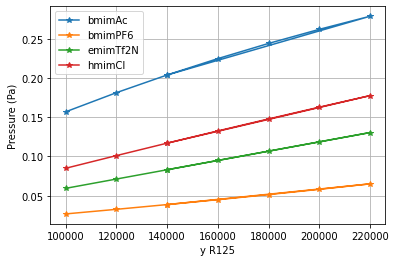

In [7]:
plt.plot(P,R125_x1,"-*",label="bmimAc")  
plt.plot(P,R125_x2,"-*",label="bmimPF6")  
plt.plot(P,R125_x3,"-*",label="emimTf2N")  
plt.plot(P,R125_x4,"-*",label="hmimCl")    

plt.ylabel('Pressure (Pa)')
plt.xlabel('y R125')
plt.grid(True)
plt.legend()
plt.show()

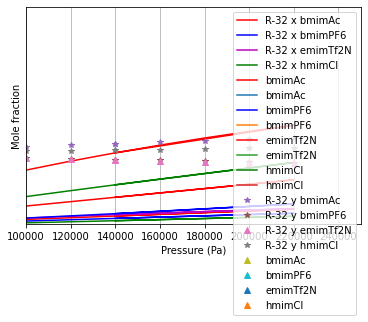

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(P,R32_x1,"r",label="R-32 x bmimAc")  
plt.plot(P,R32_x2,"b",label="R-32 x bmimPF6")  
plt.plot(P,R32_x3,"m",label="R-32 x emimTf2N")  
plt.plot(P,R32_x4,"g",label="R-32 x hmimCl")    
plt.plot(P,R125_x1,"r","-",label="bmimAc")  
plt.plot(P,R125_x2,"b","-",label="bmimPF6")  
plt.plot(P,R125_x3,"r","-",label="emimTf2N")  
plt.plot(P,R125_x4,"g","-",label="hmimCl")   

plt.plot(P,R32_y1,"*",label="R-32 y bmimAc")  
plt.plot(P,R32_y2,"*",label="R-32 y bmimPF6")  
plt.plot(P,R32_y3,"^",label="R-32 y emimTf2N")  
plt.plot(P,R32_y4,"*",label="R-32 y hmimCl")    
plt.plot(P,R125_y1,"^",label="bmimAc")  
plt.plot(P,R125_y2,"^",label="bmimPF6")  
plt.plot(P,R125_y3,"^",label="emimTf2N")  
plt.plot(P,R125_y4,"^",label="hmimCl")  


plt.xlabel('Pressure (Pa)')
plt.ylabel('Mole fraction')
plt.grid(True)
plt.legend()
ax.set_ylim([0.01, 0.6])
ax.set_xlim([1e5, 2.5e5])
plt.show()

In [9]:
VR32_1 = np.zeros((len(P)))
VR125_1 = np.zeros((len(P)))
LR32_1 = np.zeros((len(P)))
LR125_1 = np.zeros((len(P)))

VR32_2 = np.zeros((len(P)))
VR125_2 = np.zeros((len(P)))
LR32_2 = np.zeros((len(P)))
LR125_2 = np.zeros((len(P)))

VR32_3 = np.zeros((len(P)))
VR125_3 = np.zeros((len(P)))
LR32_3 = np.zeros((len(P)))
LR125_3 = np.zeros((len(P)))

VR32_4 = np.zeros((len(P)))
VR125_4 = np.zeros((len(P)))
LR32_4 = np.zeros((len(P)))
LR125_4 = np.zeros((len(P)))

for i in range(len(P)):
    VR32_1[i] = R32_y1[i] * V1[i]
    VR125_1[i] = R125_y1[i] * V1[i]
    LR32_1[i] = R32_x1[i] * L1[i]
    LR125_1[i] = R125_x1[i] * L1[i]

    VR32_2[i] = R32_y2[i] * V2[i]
    VR125_2[i] = R125_y2[i] * V2[i]
    LR32_2[i] = R32_x2[i] * L2[i]
    LR125_2[i] = R125_x2[i] * L2[i]

    VR32_3[i] = R32_y3[i] * V3[i]
    VR125_3[i] = R125_y3[i] * V3[i]
    LR32_3[i] = R32_x3[i] * L3[i]
    LR125_3[i] = R125_x3[i] * L3[i]

    VR32_4[i] = R32_y4[i] * V4[i]
    VR125_4[i] = R125_y4[i] * V4[i]
    LR32_4[i] = R32_x4[i] * L4[i]
    LR125_4[i] = R125_x4[i] * L4[i]


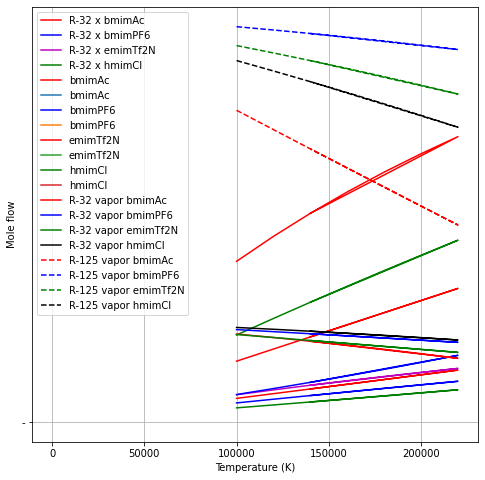

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(P,R32_x1,"r",label="R-32 x bmimAc")  
plt.plot(P,R32_x2,"b",label="R-32 x bmimPF6")  
plt.plot(P,R32_x3,"m",label="R-32 x emimTf2N")  
plt.plot(P,R32_x4,"g",label="R-32 x hmimCl")    
plt.plot(P,R125_x1,"r","-",label="bmimAc")  
plt.plot(P,R125_x2,"b","-",label="bmimPF6")  
plt.plot(P,R125_x3,"r","-",label="emimTf2N")  
plt.plot(P,R125_x4,"g","-",label="hmimCl")   

plt.plot(P,VR32_1,linestyle='-', color='red',label="R-32 vapor bmimAc")  
plt.plot(P,VR32_2,linestyle='-', color='blue',label="R-32 vapor bmimPF6")  
plt.plot(P,VR32_3,linestyle='-', color='green',label="R-32 vapor emimTf2N")  
plt.plot(P,VR32_4,linestyle='-', color='black',label="R-32 vapor hmimCl")    
plt.plot(P,VR125_1, linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(P,VR125_2, linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(P,VR125_3, linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(P,VR125_4, linestyle='--', color='black',label="R-125 vapor hmimCl")  


plt.xlabel('Temperature (K)')
plt.ylabel('Mole flow')
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

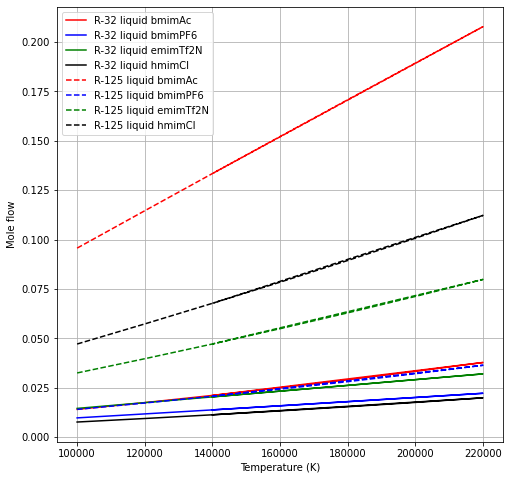

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(P,LR32_1,linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(P,LR32_2,linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(P,LR32_3,linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(P,LR32_4,linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(P,LR125_1, linestyle='--', color='red',label="R-125 liquid bmimAc")  
plt.plot(P,LR125_2, linestyle='--', color='blue',label="R-125 liquid bmimPF6")  
plt.plot(P,LR125_3, linestyle='--', color='green',label="R-125 liquid emimTf2N")  
plt.plot(P,LR125_4, linestyle='--', color='black',label="R-125 liquid hmimCl")  


plt.xlabel('Temperature (K)')
plt.ylabel('Mole flow')
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()